Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [2]:
df=pd.read_csv("walmart_data.csv")

About Walmart:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

About the Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features

*   User_ID: User ID


*   Product_ID: Product ID

*   Gender: Gender of User

*   Age: Age in bins

*   Occupation: Occupation


*   City_Category: Category of the City (A,B,C)

*   StayInCurrentCityYears: Number of years stay in current city



*   Marital_Status: Marital Status


*   ProductCategory: Product Category

*   Purchase: Purchase Amount








# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer's gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers.

# 1) Basic Analysis

In [3]:
df.shape

(550068, 10)

In [4]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [5]:
# Datatypes of all the columns
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
# Converting Occupation,Marital_Status and Product_Category Columns from int to categorical
df['Occupation']=df['Occupation'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')
df['Product_Category']=df['Product_Category'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(3), int64(2), object(5)
memory usage: 31.0+ MB


In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observations:


*   There are 550068 rows and 10 columns
*   There are no missing values in the dataset



In [9]:
# Statistical Summary for Purchase Column
df[['Purchase']].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [10]:
# Value counts and unique attributes for categorical columns
cat_cols = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
for column in cat_cols:
    print(f"\nColumn: {column}")
    print("Value Counts:")
    print(df[column].value_counts())
    print("\nUnique Attributes:")
    print(df[column].unique())
    print("-" * 30)


Column: Gender
Value Counts:
M    414259
F    135809
Name: Gender, dtype: int64

Unique Attributes:
['F' 'M']
------------------------------

Column: Age
Value Counts:
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Unique Attributes:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
------------------------------

Column: Occupation
Value Counts:
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

Unique Attributes:
[10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]
------------------------------

Column: City_Category
Value Counts:
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

U

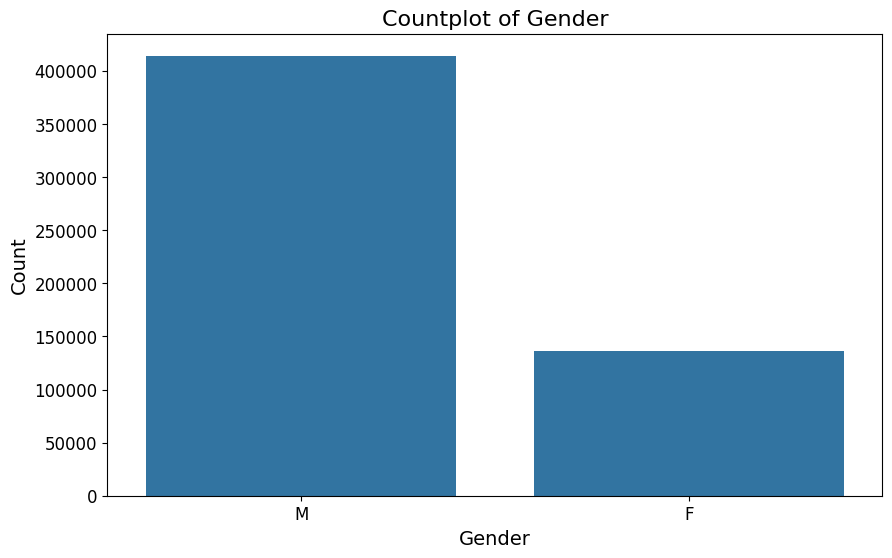

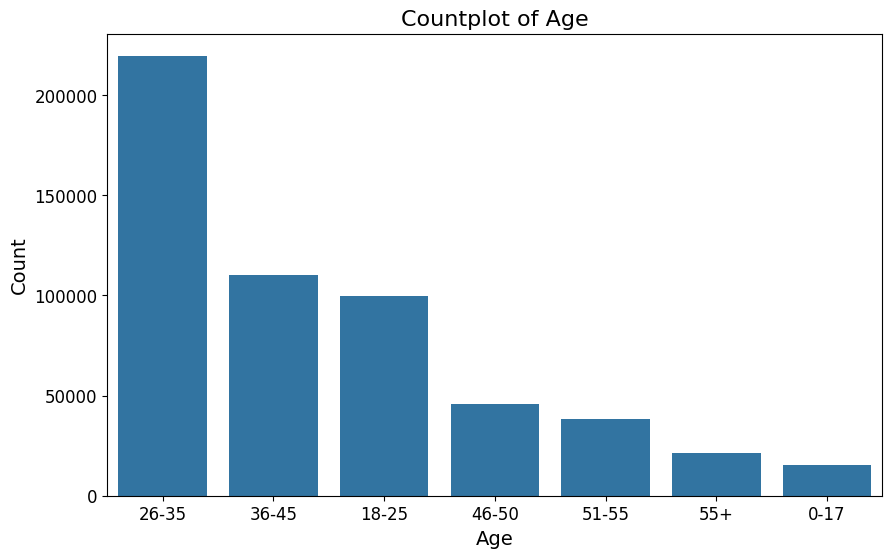

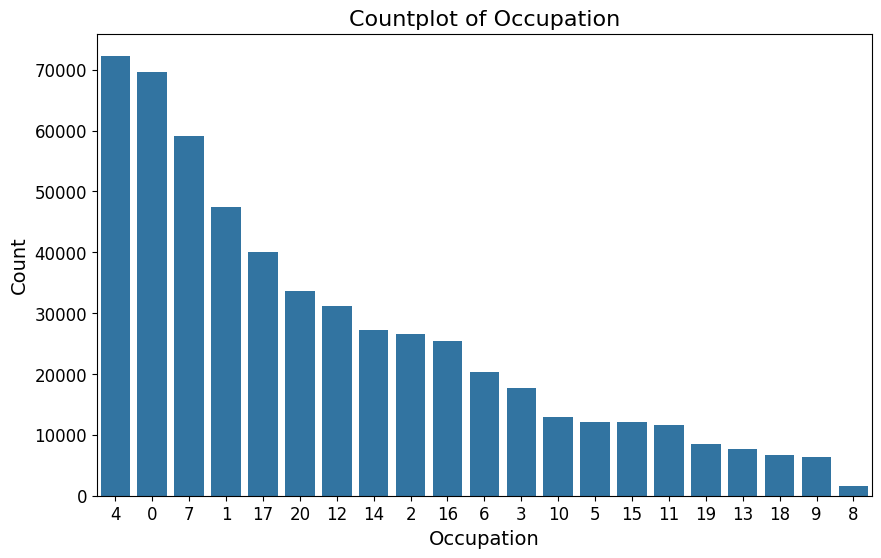

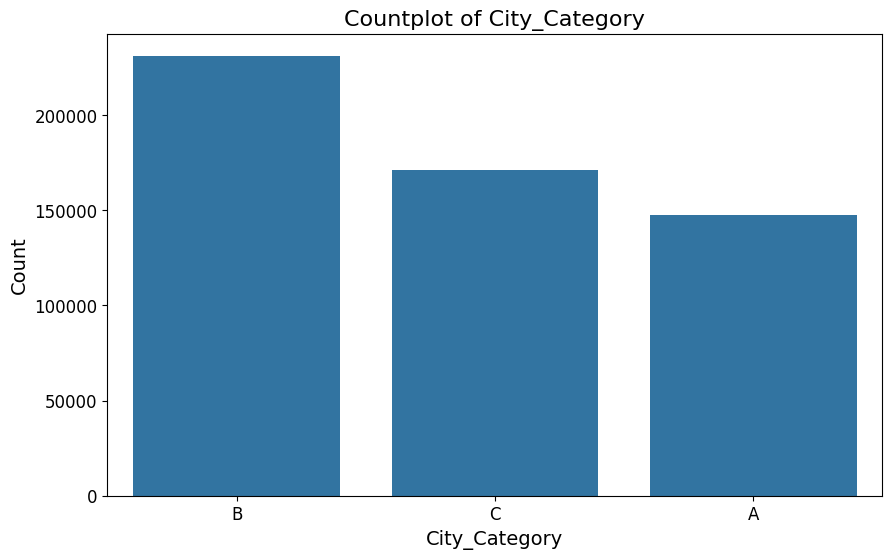

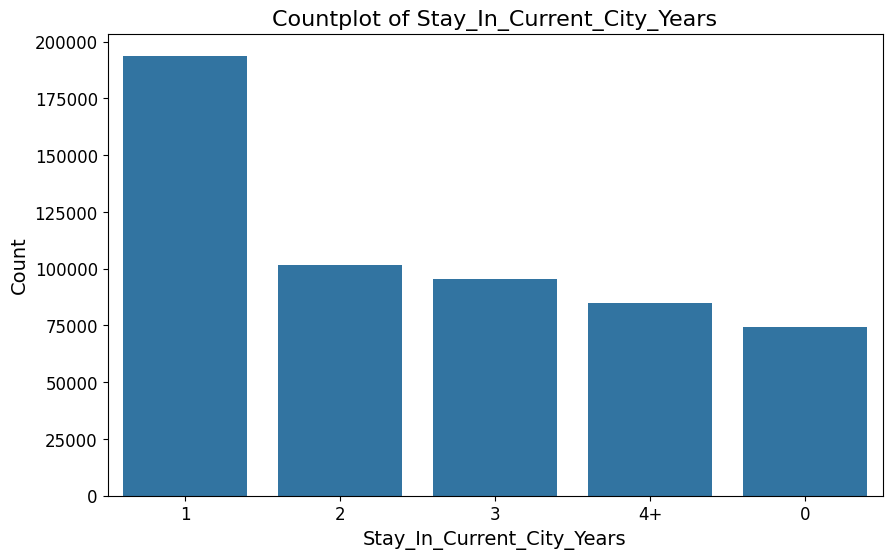

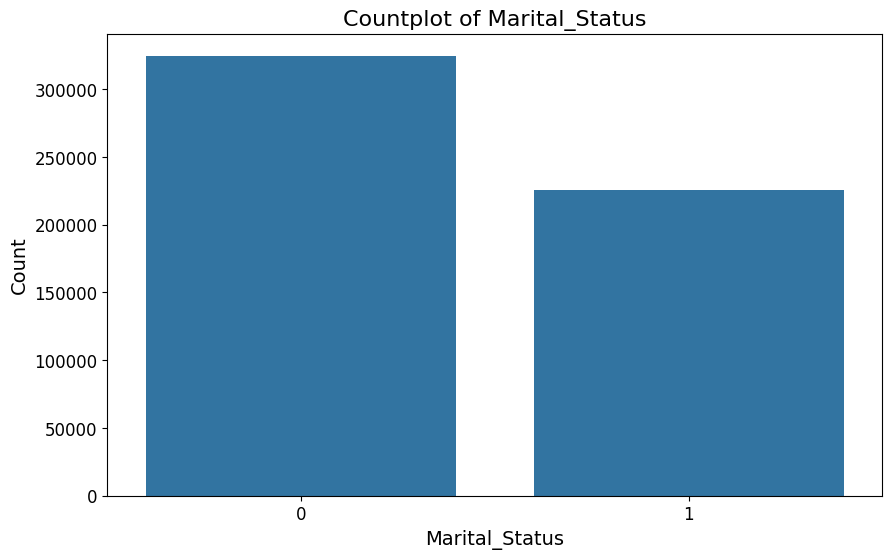

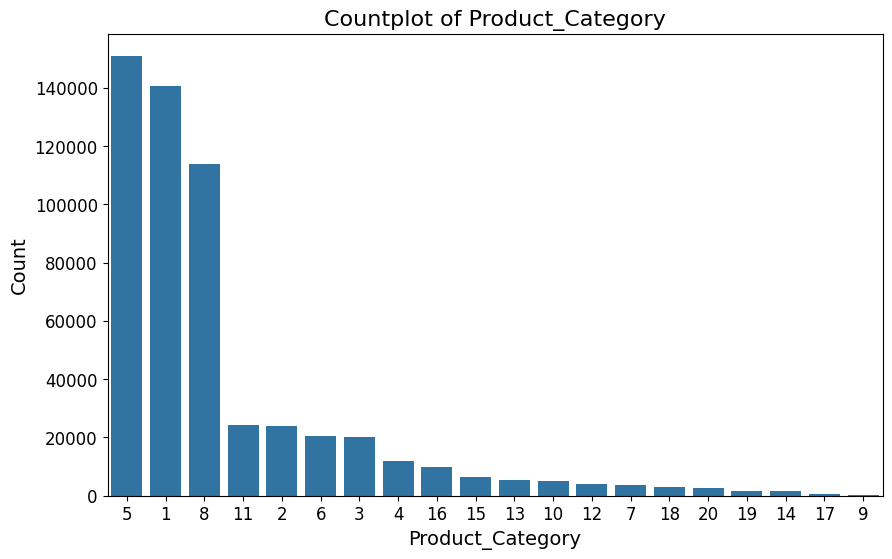

In [11]:
# Countplot for each categorical variable
for col in cat_cols:
    plt.figure(figsize=(10, 6))

    # Getting the order of categories based on frequency
    order = df[col].value_counts().index

    sns.countplot(data=df, x=col, order=order)
    plt.title(f'Countplot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# 2) Detection of Outliers

a. Finding outliers for the numerical variable 'Purchase'

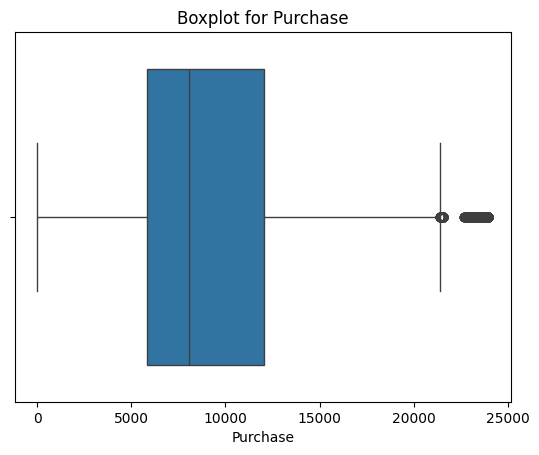

In [12]:
# Checking outliers for 'Purchase' column
plt.title("Boxplot for Purchase")
sns.boxplot(data=df,x='Purchase')
plt.show()

In [13]:
q1= np.percentile(df['Purchase'], 25)
q3= np.percentile(df['Purchase'], 75)
IQR=q3-q1
upper_limit = q3 + 1.5 * IQR

# All values greater than the upper limit are outliers
outliers_purchase = df[df["Purchase"]>upper_limit]
k=len(outliers_purchase)
print(f"There are {k} outliers in 'Purchase' column")

There are 2677 outliers in 'Purchase' column


b. Clipping the data between the 5 percentile and 95 percentile for the numerical column 'Purchase'

In [14]:
df['Purchase']=np.clip(df['Purchase'],np.percentile(df['Purchase'],5),np.percentile(df['Purchase'],95))

# 3) Data Exploration

a. What products are different age groups buying?


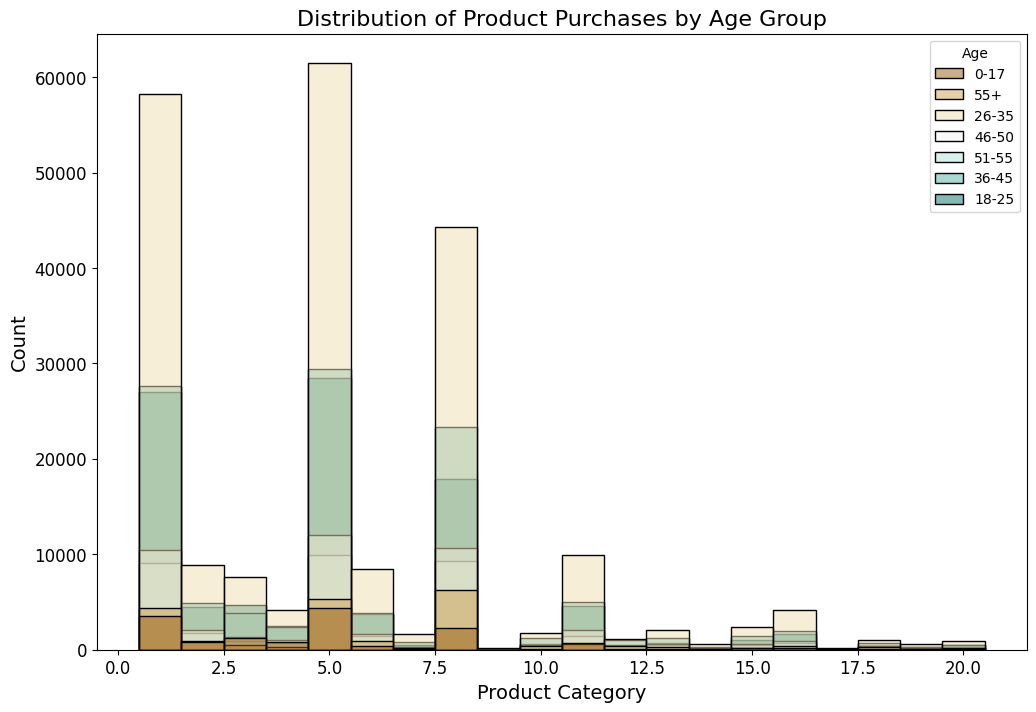

In [15]:
# Plotting histplot for Product_Category by Age
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Product_Category', hue='Age',bins=20,palette='BrBG')
plt.title('Distribution of Product Purchases by Age Group', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
pd.crosstab(df['Product_Category'], df['Age'])

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411
2,805,4428,8928,4912,2105,1781,905
3,1200,4710,7662,3854,1376,924,487
4,758,2463,4192,2354,990,678,318
5,4330,28522,61473,29377,11971,9893,5367
6,399,3749,8485,3899,1622,1450,862
7,53,481,1651,809,327,266,134
8,2258,17911,44256,23296,10656,9340,6208
9,16,63,154,107,33,29,8


Observations:
* Age groups 26-35 and 36-45 appear to have the highest purchase counts across most product categories
* Age group 0-17 appears to have the lowest purchase counts across most product categories
* Product categories 1, 5 and 8 appear to have higher purchase counts across all age groups
*  Product categories 9, 14 and 17 appear to have lower purchase counts across all age groups



b. Is there a relationship between age, marital status, and the amount spent?


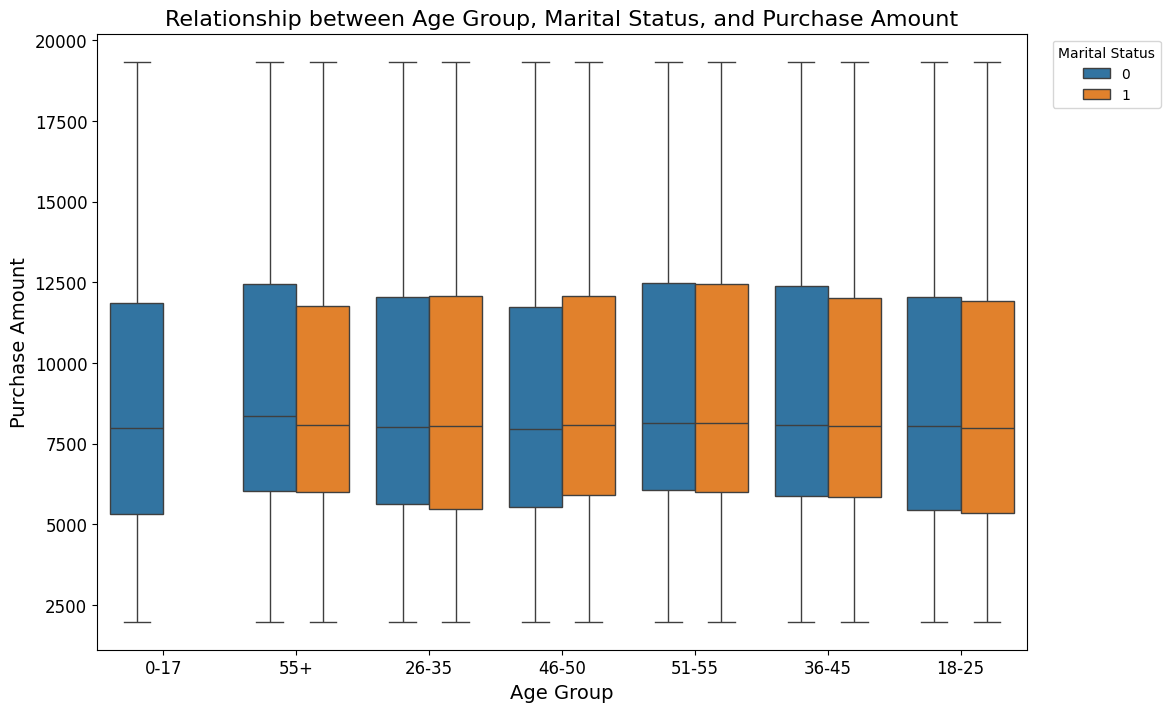

In [17]:
# Box plot to visualize the relationship between Age ,Marital_Status, and Purchase
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.title('Relationship between Age Group, Marital Status, and Purchase Amount', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Marital Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Observation: Age and Marital Status do not appear to significantly influence the purchasing behavior

c. Are there preferred product categories for different genders?


In [18]:
# Filtering dataframe for males and females
male_df = df[df['Gender'] == 'M']
female_df = df[df['Gender'] == 'F']

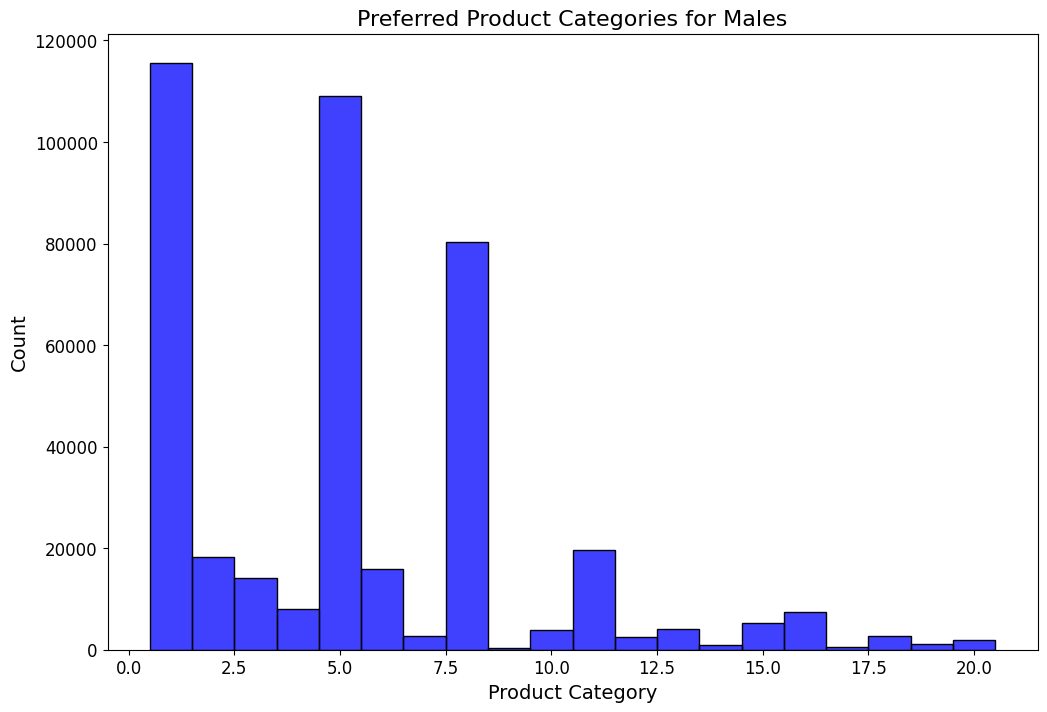

In [19]:
# Plotting histplot for males
plt.figure(figsize=(12, 8))
sns.histplot(data=male_df, x='Product_Category', bins=20, color='blue')
plt.title('Preferred Product Categories for Males', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

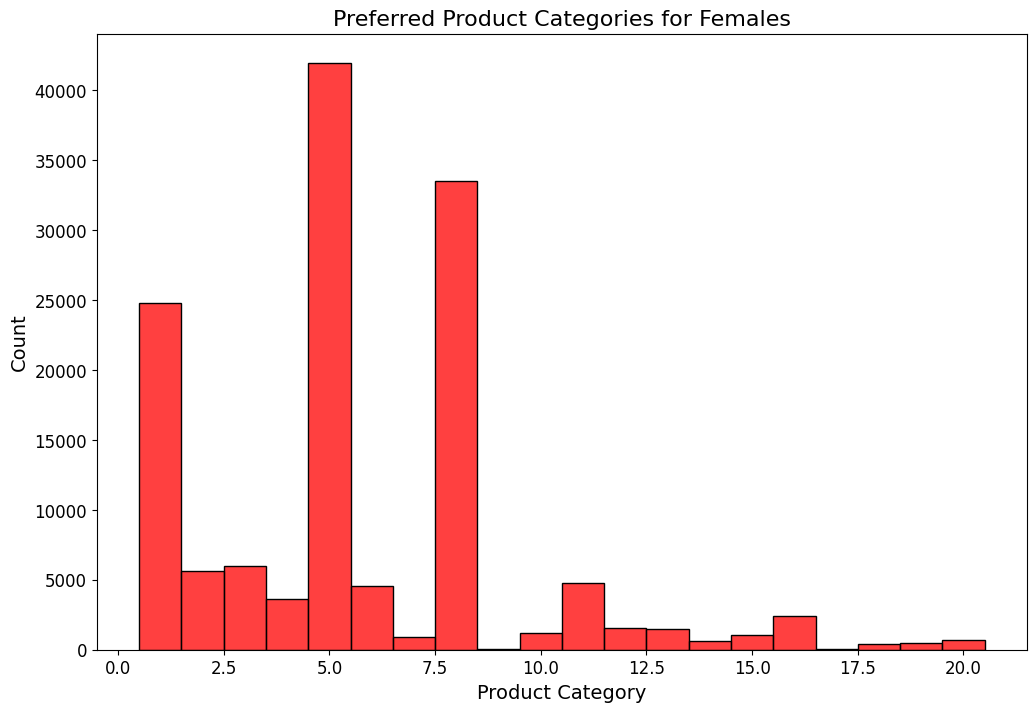

In [20]:
# Plotting histplot for females
plt.figure(figsize=(12, 8))
sns.histplot(data=female_df, x='Product_Category', bins=20, color='red')
plt.title('Preferred Product Categories for Females', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

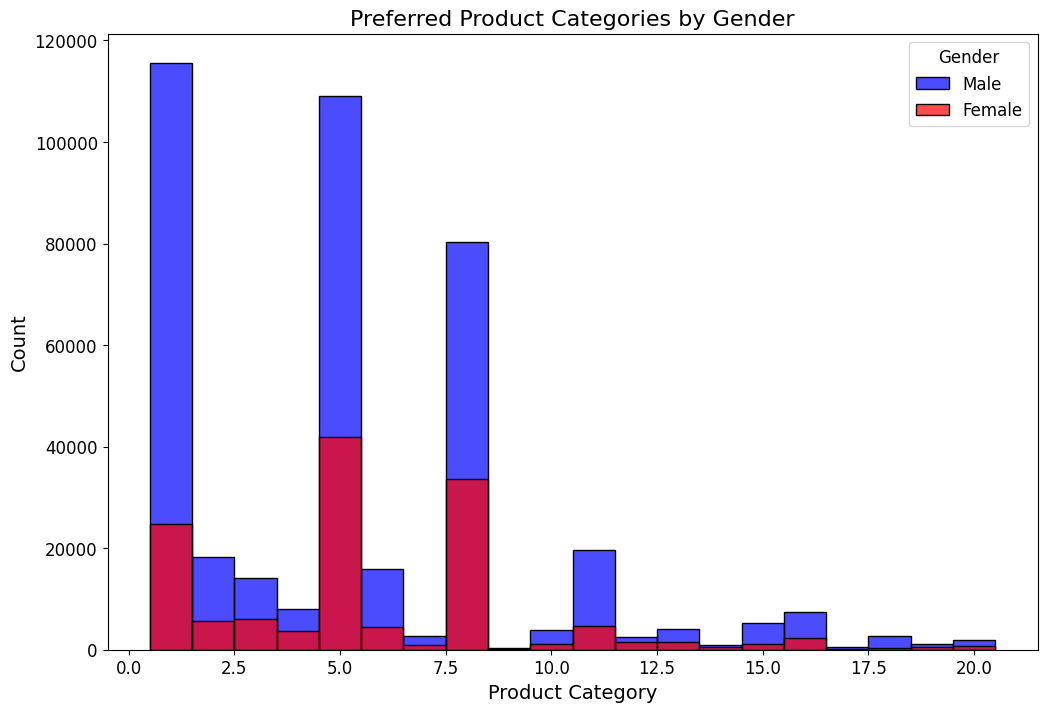

In [21]:
plt.figure(figsize=(12, 8))

# Plotting histplot for males
sns.histplot(data=male_df, x='Product_Category', bins=20, color='blue', alpha=0.7, label='Male')

# Plotting histplot for females
sns.histplot(data=female_df, x='Product_Category', bins=20, color='red', alpha=0.7, label='Female')

plt.title('Preferred Product Categories by Gender', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=12)
plt.show()

Observation: Both males and females tend to prefer product categories 1, 5, and 8

# 4) How does gender affect the amount spent?


In [22]:
# Function to compute confidence interval using Central Limit Theorem
def clt_ci(data, sample_size, alpha=0.05):
    """
    This function computes the confidence interval using
    Central Limit Theorem.
    Parameters:
        data : pandas Series
            The data for which the confidence interval is to
            be computed.
        sample_size : int
            The size of the sample used for estimation.
        alpha : float
            The significance level for the confidence interval.
            Default is 0.05.
    """
    # Calculating population mean and standard deviation
    population_mean = np.mean(data)
    population_std = np.std(data)

    # Finding sample mean and standard deviation using CLT
    sample_mean = population_mean
    sample_std = population_std / np.sqrt(sample_size)

    # Determining critical Z-value for desired confidence level
    z_score = norm.ppf(alpha / 2)

    # Computing margin of error
    margin_of_error = z_score * (sample_std)

    # Computing confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    # Arranging lower and upper bounds in ascending order
    lower_bound, upper_bound = min(lower_bound, upper_bound), max(lower_bound, upper_bound)

    return lower_bound, upper_bound

In [23]:
# Function to compute confidence interval using bootstrapping
def bootstrap_ci(data, n_bootstrap=1000, alpha=0.05):
    """
    This function computes the confidence interval using bootstrapping.
    Parameters:
        data : pandas Series
            The data for which the confidence interval is to be computed.
        n_bootstrap : int
            Number of bootstrap samples to generate. Default is 1000.
        alpha : float
            The significance level for the confidence interval. Default is 0.05.

    """
    bootstrap_means = []

    # Generate bootstrap samples and compute means
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)

    # Calculate confidence interval bounds
    lower_bound = np.percentile(bootstrap_means, 100 * alpha / 2)
    upper_bound = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

In [24]:
# Confidence Intervals using Central Limit Theorem
print("Using Central Limit Theorem")
print("--"*30)

# Computing confidence intervals for the entire dataset
male_data = male_df['Purchase']
female_data = female_df['Purchase']
male_ci = clt_ci(male_data,sample_size=len(male_data))
female_ci = clt_ci(female_data,sample_size=len(female_data))

# Printing confidence intervals for the entire dataset
print("Confidence Intervals for Entire Dataset:")
print("Male 95% Confidence Interval:", male_ci)
print("Female 95% Confidence Interval:", female_ci)

# Defining sample sizes
sample_sizes = [300, 3000, 30000]

# Computing confidence intervals for different sample sizes
for size in sample_sizes:
    male_sample = male_data.sample(n=size, replace=True)
    female_sample = female_data.sample(n=size, replace=True)
    male_ci = clt_ci(male_sample,sample_size=size)
    female_ci = clt_ci(female_sample,sample_size=size)
    print("\nSample Size:", size)
    print("Male 95% Confidence Interval:", male_ci)
    print("Female 95% Confidence Interval:", female_ci)

Using Central Limit Theorem
------------------------------------------------------------
Confidence Intervals for Entire Dataset:
Male 95% Confidence Interval: (9412.240629121241, 9442.241364027972)
Female 95% Confidence Interval: (8712.09159453744, 8760.988937680602)

Sample Size: 300
Male 95% Confidence Interval: (8688.359256742997, 9845.920743257002)
Female 95% Confidence Interval: (8318.046223029902, 9325.0137769701)

Sample Size: 3000
Male 95% Confidence Interval: (9400.549568820074, 9756.068431179925)
Female 95% Confidence Interval: (8697.36154811849, 9027.471118548176)

Sample Size: 30000
Male 95% Confidence Interval: (9365.512148983975, 9476.88171768269)
Female 95% Confidence Interval: (8685.305084198282, 8790.385915801717)


In [25]:
# Confidence Intervals using bootstrapping
print("Using Bootstrapping")
print("--"*30)
# Computing confidence intervals for the entire dataset
male_data = male_df['Purchase']
female_data = female_df['Purchase']
male_ci = bootstrap_ci(male_data)
female_ci = bootstrap_ci(female_data)

# Printing confidence intervals for the entire dataset
print("Confidence Intervals for Entire Dataset:")
print("Male 95% Confidence Interval:", male_ci)
print("Female 95% Confidence Interval:", female_ci)

# Defining sample sizes
sample_sizes = [300, 3000, 30000]

# Computing confidence intervals for different sample sizes
for size in sample_sizes:
    male_sample = male_data.sample(n=size, replace=True)
    female_sample = female_data.sample(n=size, replace=True)
    male_ci = bootstrap_ci(male_sample)
    female_ci = bootstrap_ci(female_sample)
    print("\nSample Size:", size)
    print("Male 95% Confidence Interval:", male_ci)
    print("Female 95% Confidence Interval:", female_ci)

Using Bootstrapping
------------------------------------------------------------
Confidence Intervals for Entire Dataset:
Male 95% Confidence Interval: (9410.853243260859, 9440.379516377436)
Female 95% Confidence Interval: (8711.163657968176, 8761.550937529912)

Sample Size: 300
Male 95% Confidence Interval: (9044.3505, 10205.139416666667)
Female 95% Confidence Interval: (7851.671, 8788.555833333332)

Sample Size: 3000
Male 95% Confidence Interval: (9300.562908333333, 9642.755441666668)
Female 95% Confidence Interval: (8618.145116666667, 8942.698333333334)

Sample Size: 30000
Male 95% Confidence Interval: (9423.882600833334, 9536.998679166667)
Female 95% Confidence Interval: (8727.769227499999, 8831.742866666667)


In [31]:
def plot_bootstrap_histograms(data, n_bootstrap=1000, sample_sizes=[300, 3000, 30000], title=None):

    """
    This function plots histograms of bootstrapped means
    for different sample sizes.
    Parameters:
    data : pandas Series
        The data for which the confidence interval is to be computed.
    n_bootstrap : int
        Number of bootstrap samples to generate. Default is 1000.
    sample_sizes: list
        A list of sample sizes for which bootstrap histograms will be
        plotted.Default is [300, 3000, 30000].
    title :  str
        The title for the plot. Default is None.

    """
    bootstrap_means = {size: [] for size in sample_sizes}

    plt.figure(figsize=(12, 6))

    # Generating bootstrap samples and compute means for each sample size
    for size in sample_sizes:
        for _ in range(n_bootstrap):
            bootstrap_sample = np.random.choice(data, size=size, replace=True)
            bootstrap_mean = np.mean(bootstrap_sample)
            bootstrap_means[size].append(bootstrap_mean)

        # Plotting histogram for the current sample size
        plt.hist(bootstrap_means[size], bins=30, alpha=0.5, label=f'Sample Size: {size}')

    # Adding labels and legend
    plt.xlabel('Mean')
    plt.ylabel('Frequency')
    plt.legend()

    if title:
        plt.title(title)

    plt.show()


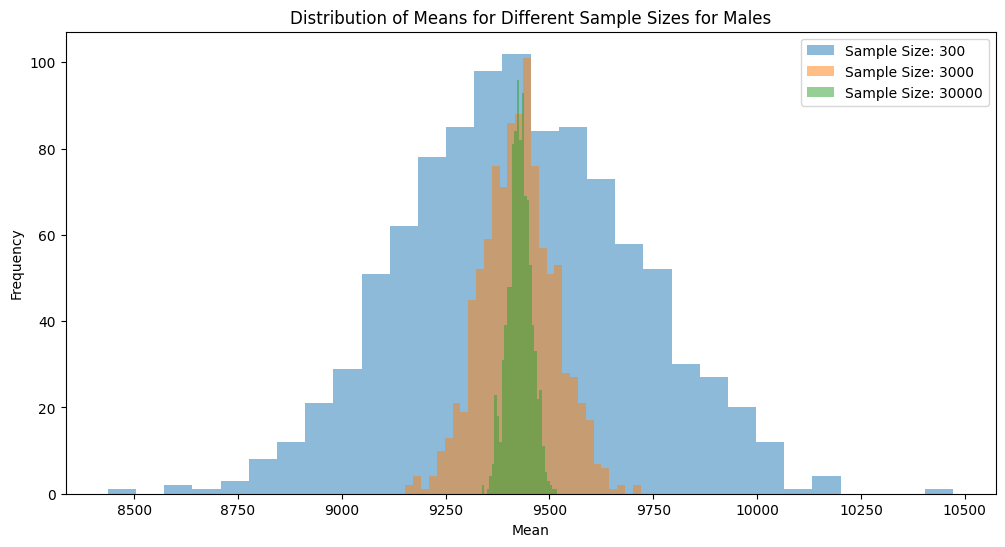

In [32]:
# Distribution of Means for Different Sample Sizes for males
plot_bootstrap_histograms(male_data, title='Distribution of Means for Different Sample Sizes for Males')

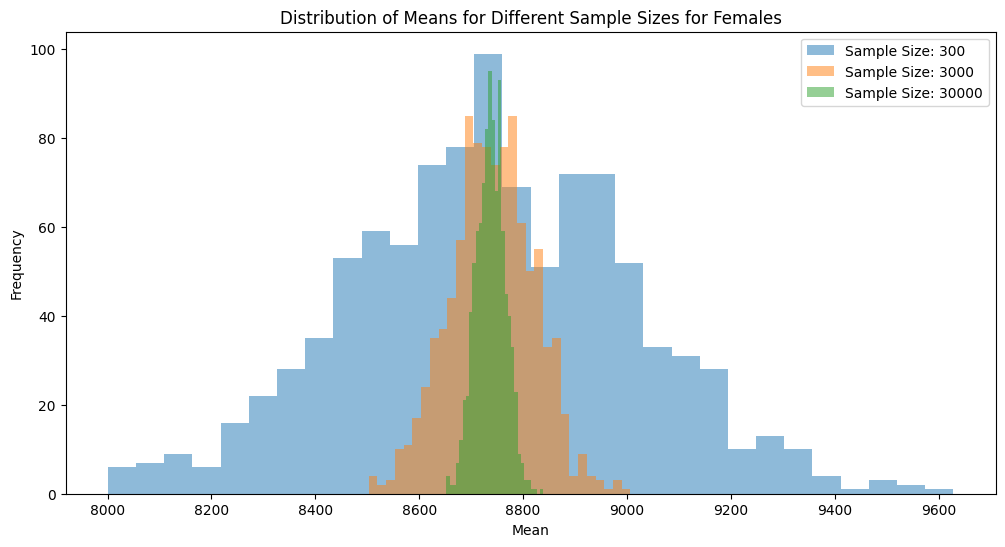

In [33]:
# Distribution of Means for Different Sample Sizes for females
plot_bootstrap_histograms(female_data, title='Distribution of Means for Different Sample Sizes for Females')

Observations:


1. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?
* Yes, the confidence interval computed using the entire dataset is wider for females compared to males. This could be due to variations in the amount spent among females being higher than among males, resulting in a larger standard deviation.


2. How is the width of the confidence interval affected by the sample size?
* The width of the confidence interval decreases as the sample size increases.

3. Do the confidence intervals for different sample sizes overlap?
* Yes, the confidence intervals for different sample sizes overlap for both males and females.


4. How does the sample size affect the shape of the distributions of the
means?
* As the sample size increases, the distribution of sample means becomes more normally distributed for both males and females.



# 5) How does Marital_Status affect the amount spent?

In [34]:
# Confidence Intervals using Central Limit Theorem
print("Using Central Limit Theorem")
print("--"*30)

# Compute confidence intervals for the entire dataset
married_data = df[df['Marital_Status']==1]['Purchase']
unmarried_data = df[df['Marital_Status']==0]['Purchase']
married_ci = clt_ci(married_data,sample_size=len(married_data))
unmarried_ci = clt_ci(unmarried_data,sample_size=len(unmarried_data))

# Print confidence intervals for the entire dataset
print("Confidence Intervals for Entire Dataset:")
print("Married 95% Confidence Interval:", married_ci)
print("Unmarried 95% Confidence Interval:", unmarried_ci)

# Define sample sizes
sample_sizes = [300, 3000, 30000]

# Compute confidence intervals for different sample sizes
for size in sample_sizes:
    married_sample = married_data.sample(n=size, replace=True)
    unmarried_sample = unmarried_data.sample(n=size, replace=True)
    married_ci = clt_ci(married_sample,sample_size=size)
    unmarried_ci = clt_ci(unmarried_sample,sample_size=size)
    print("\nSample Size:", size)
    print("Married 95% Confidence Interval:", married_ci)
    print("Unmarried 95% Confidence Interval:", unmarried_ci)

Using Central Limit Theorem
------------------------------------------------------------
Confidence Intervals for Entire Dataset:
Married 95% Confidence Interval: (9233.671712994024, 9273.667933846044)
Unmarried 95% Confidence Interval: (9242.089111995281, 9275.551815418485)

Sample Size: 300
Married 95% Confidence Interval: (8299.984750537182, 9395.861916129486)
Unmarried 95% Confidence Interval: (8713.15409244913, 9832.84590755087)

Sample Size: 3000
Married 95% Confidence Interval: (9214.14828592409, 9557.126380742578)
Unmarried 95% Confidence Interval: (9022.484073015508, 9366.605926984492)

Sample Size: 30000
Married 95% Confidence Interval: (9159.623089757808, 9269.350243575524)
Unmarried 95% Confidence Interval: (9258.336092340149, 9369.086774326519)


In [35]:
# Confidence Intervals using bootstrapping
print("Using Bootstrapping")
print("--"*30)

# Compute confidence intervals for the entire dataset
married_data = df[df['Marital_Status']==1]['Purchase']
unmarried_data = df[df['Marital_Status']==0]['Purchase']
married_ci = bootstrap_ci(married_data)
unmarried_ci = bootstrap_ci(unmarried_data)

# Print confidence intervals for the entire dataset
print("Confidence Intervals for Entire Dataset:")
print("Married 95% Confidence Interval:", married_ci)
print("Unmarried 95% Confidence Interval:", unmarried_ci)

# Define sample sizes
sample_sizes = [300, 3000, 30000]

# Compute confidence intervals for different sample sizes
for size in sample_sizes:
    married_sample = married_data.sample(n=size, replace=True)
    unmarried_sample = unmarried_data.sample(n=size, replace=True)
    married_ci = bootstrap_ci(married_sample)
    unmarried_ci = bootstrap_ci(unmarried_sample)
    print("\nSample Size:", size)
    print("Married 95% Confidence Interval:", married_ci)
    print("Unmarried 95% Confidence Interval:", unmarried_ci)

Using Bootstrapping
------------------------------------------------------------
Confidence Intervals for Entire Dataset:
Married 95% Confidence Interval: (9233.687048176731, 9275.442939353059)
Unmarried 95% Confidence Interval: (9241.869744188267, 9275.525607194877)

Sample Size: 300
Married 95% Confidence Interval: (8596.149, 9665.713)
Unmarried 95% Confidence Interval: (8868.321333333333, 10030.314916666666)

Sample Size: 3000
Married 95% Confidence Interval: (9204.948041666667, 9553.063675)
Unmarried 95% Confidence Interval: (9130.944591666668, 9475.649666666668)

Sample Size: 30000
Married 95% Confidence Interval: (9276.533823333333, 9379.624666666667)
Unmarried 95% Confidence Interval: (9186.0147375, 9290.849819166666)


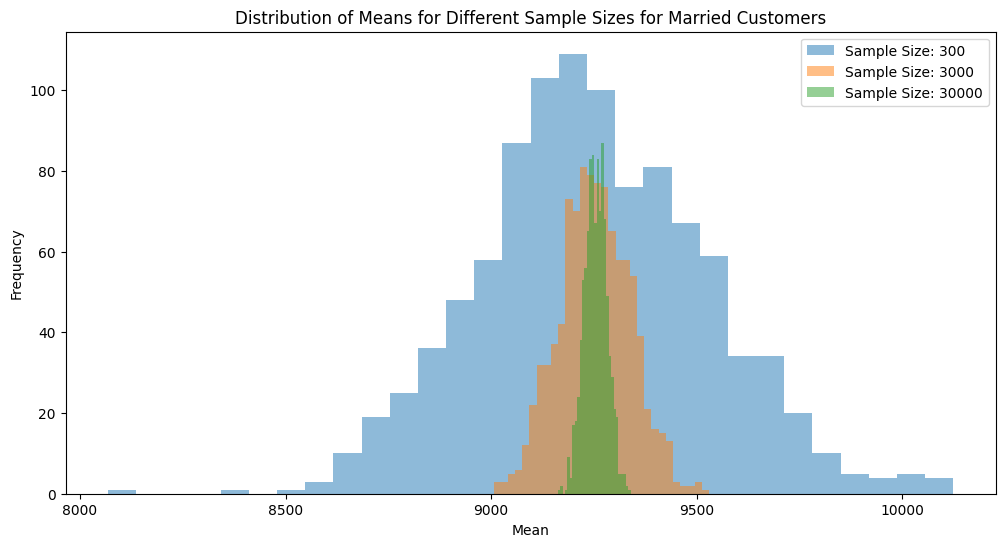

In [37]:
# Distribution of Means for Different Sample Sizes for married people
plot_bootstrap_histograms(married_data, title='Distribution of Means for Different Sample Sizes for Married Customers')

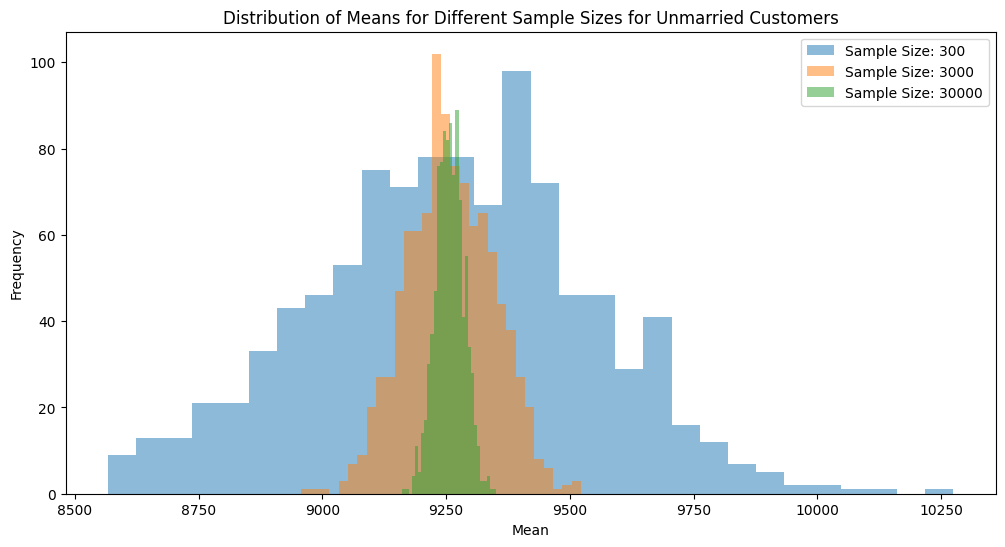

In [38]:
# Distribution of Means for Different Sample Sizes for unmarried people
plot_bootstrap_histograms(unmarried_data, title='Distribution of Means for Different Sample Sizes for Unmarried Customers')

Observations:


1. Is the confidence interval computed using the entire dataset wider for one of the groups? Why is this the case?
* The confidence intervals computed using the entire dataset appear to be similar in width for both the "Married" and "Unmarried" groups. This suggests that there is no significant difference in the variability of the amount spent between the two marital status groups in the dataset
2. How is the width of the confidence interval affected by the sample size?
* The width of the confidence interval decreases as the sample size increases.
3. Do the confidence intervals for different sample sizes overlap?
*  Yes, the confidence intervals for different sample sizes overlap for both the "Married" and "Unmarried" groups.

4. How does the sample size affect the shape of the distributions of the means?
* As the sample size increases, the distribution of sample means tends to become more normally distributed for both married and unmarried groups.










# 6) How does Age affect the amount spent?

In [39]:
# Confidence Intervals using Central Limit Theorem
print("Using Central Limit Theorem")
print("--" * 30)

# Defining age groups
age_groups = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

# Computing confidence intervals for the entire dataset
print("Confidence Intervals for Entire Dataset:")

for age_group in age_groups:
    age_group_data = df[df['Age'] == age_group]['Purchase']
    age_group_ci = clt_ci(age_group_data, sample_size=len(age_group_data))
    print(f"{age_group} 95% Confidence Interval:", age_group_ci)

# Defining sample sizes
sample_sizes = [300, 3000, 30000]

# Computing confidence intervals for different sample sizes
for size in sample_sizes:
    print("\nSample Size:", size)
    for age_group in age_groups:
        age_group_data = df[df['Age'] == age_group]['Purchase']
        age_group_sample = age_group_data.sample(n=size, replace=True)
        age_group_ci = clt_ci(age_group_sample, sample_size=size)
        print(f"{age_group} 95% Confidence Interval:", age_group_ci)


Using Central Limit Theorem
------------------------------------------------------------
Confidence Intervals for Entire Dataset:
0-17 95% Confidence Interval: (8861.854548111229, 9019.44355809987)
18-25 95% Confidence Interval: (9138.65503182672, 9199.366922819076)
26-35 95% Confidence Interval: (9223.472911701547, 9264.087326381765)
36-45 95% Confidence Interval: (9294.276785879063, 9351.567032578756)
46-50 95% Confidence Interval: (9160.333371235687, 9248.089595439003)
51-55 95% Confidence Interval: (9466.18230852783, 9563.544192082543)
55+ 95% Confidence Interval: (9263.911323001412, 9391.68177595692)

Sample Size: 300
0-17 95% Confidence Interval: (8360.86800056533, 9524.551999434669)
18-25 95% Confidence Interval: (8216.138718258482, 9295.501281741517)
26-35 95% Confidence Interval: (8658.200742694558, 9749.812590638774)
36-45 95% Confidence Interval: (8989.856144502128, 10031.45052216454)
46-50 95% Confidence Interval: (8388.298965020864, 9419.874368312469)
51-55 95% Confidence 

In [40]:
# Confidence Intervals using bootstrapping
print("Using Bootstrapping")
print("--" * 30)

# Defining age groups
age_groups = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

# Computing confidence intervals for the entire dataset
print("Confidence Intervals for Entire Dataset:")

for age_group in age_groups:
    age_group_data = df[df['Age'] == age_group]['Purchase']
    age_group_ci = bootstrap_ci(age_group_data)
    print(f"{age_group} 95% Confidence Interval:", age_group_ci)

# Defining sample sizes
sample_sizes = [300, 3000, 30000]

# Computing confidence intervals for different sample sizes
for size in sample_sizes:
    print("\nSample Size:", size)
    for age_group in age_groups:
        age_group_data = df[df['Age'] == age_group]['Purchase']
        age_group_sample = age_group_data.sample(n=size, replace=True)
        age_group_ci = bootstrap_ci(age_group_sample)
        print(f"{age_group} 95% Confidence Interval:", age_group_ci)

Using Bootstrapping
------------------------------------------------------------
Confidence Intervals for Entire Dataset:
0-17 95% Confidence Interval: (8871.454896702424, 9020.840486359422)
18-25 95% Confidence Interval: (9139.327322145295, 9200.56798013245)
26-35 95% Confidence Interval: (9223.905236079549, 9264.57186900864)
36-45 95% Confidence Interval: (9294.772483479226, 9353.309108241754)
46-50 95% Confidence Interval: (9163.09067963502, 9244.352584735563)
51-55 95% Confidence Interval: (9464.721995532584, 9564.760392587204)
55+ 95% Confidence Interval: (9264.335099283855, 9387.416571335567)

Sample Size: 300
0-17 95% Confidence Interval: (8035.478833333333, 9209.422833333334)
18-25 95% Confidence Interval: (9018.239500000001, 10178.748000000001)
26-35 95% Confidence Interval: (8797.72375, 9922.747333333335)
36-45 95% Confidence Interval: (8910.81375, 9924.562916666666)
46-50 95% Confidence Interval: (8391.830750000001, 9487.7795)
51-55 95% Confidence Interval: (8922.00175, 9927

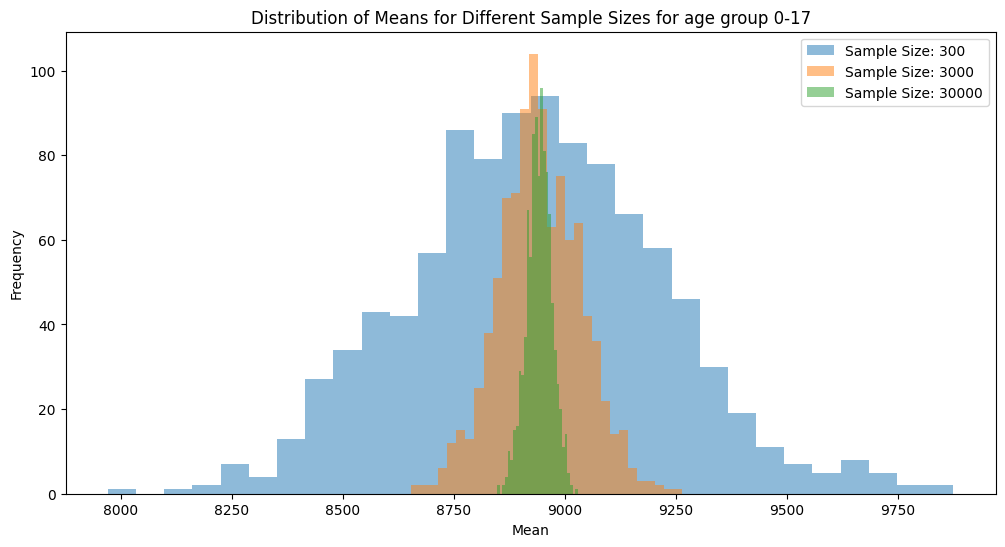

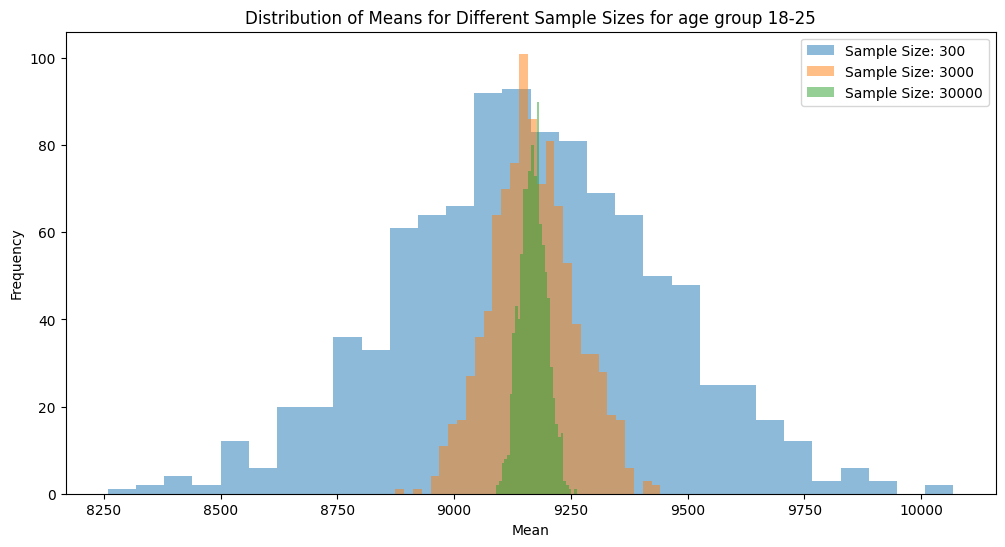

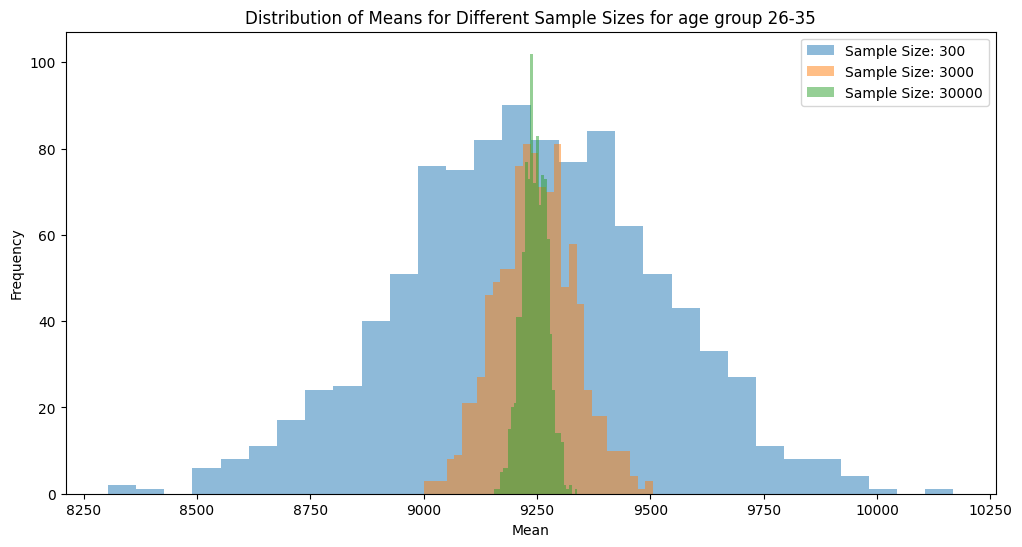

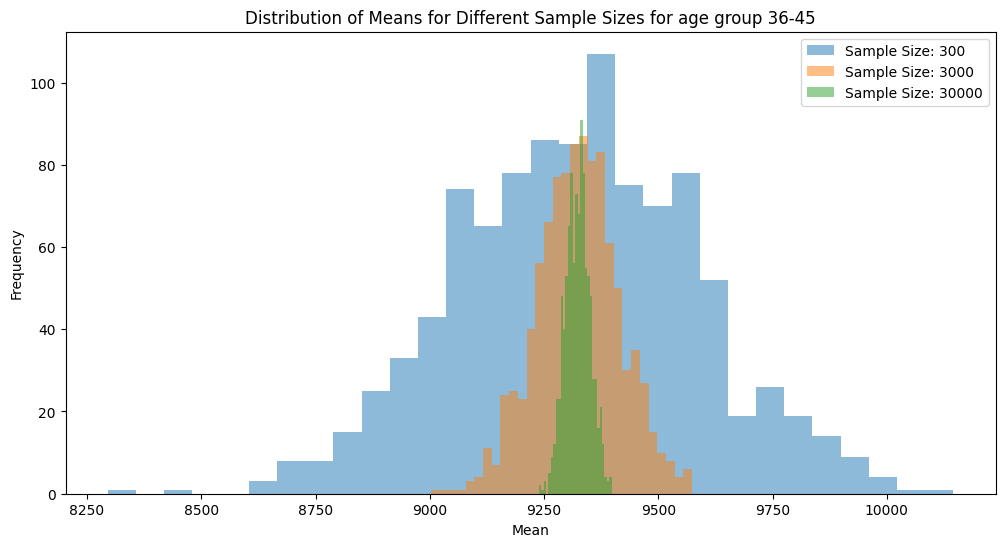

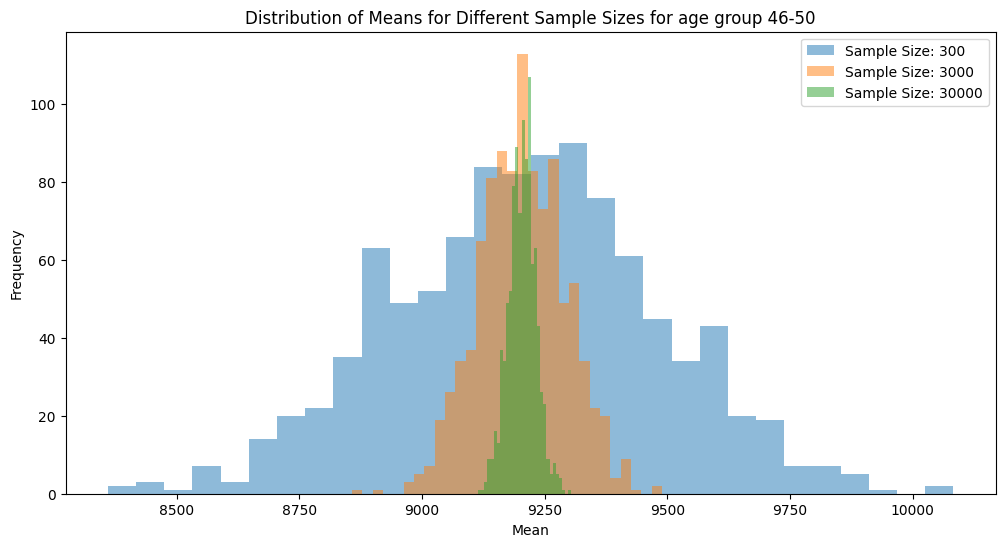

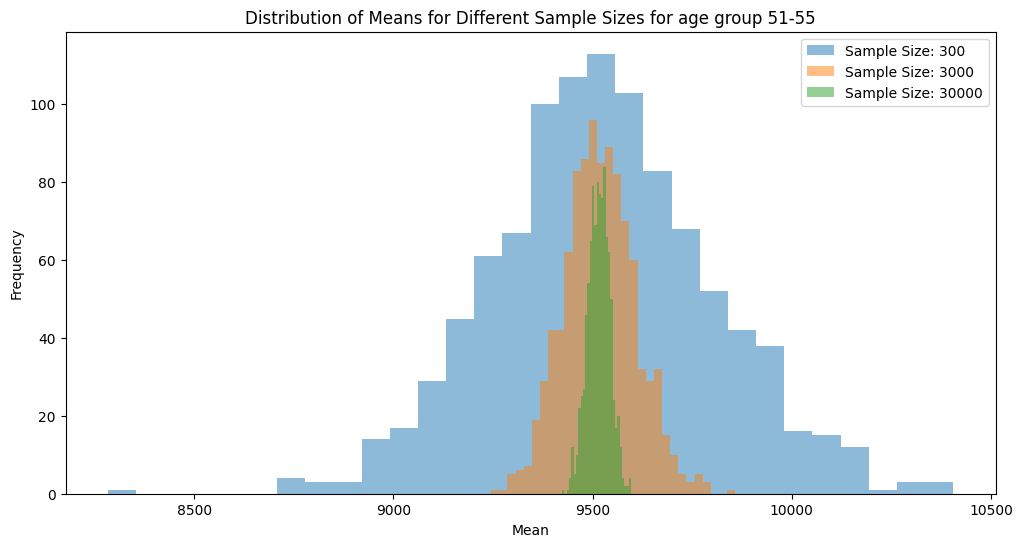

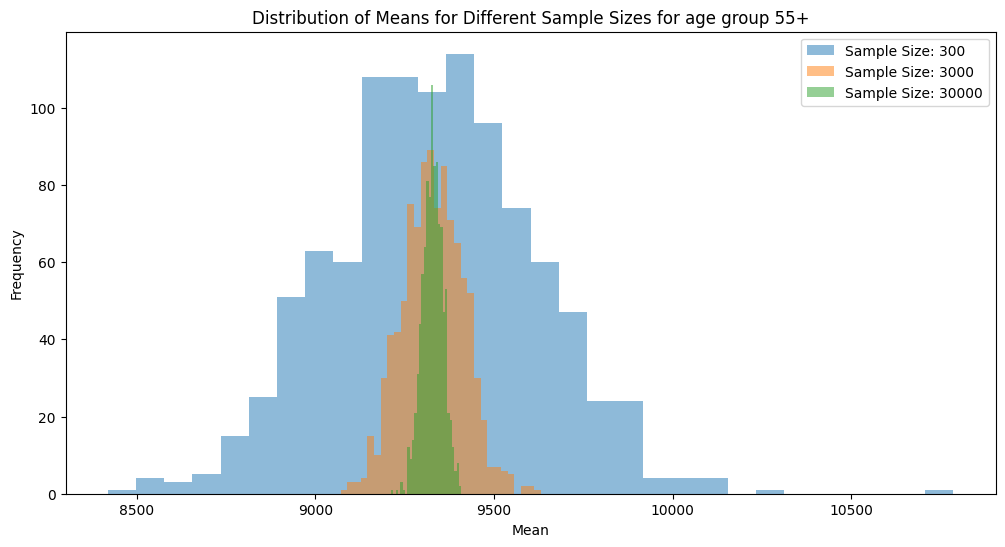

In [42]:
# Distribution of Means for Different Sample Sizes for different age groups
age_groups = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

for age_group in age_groups:
    age_cat_data = df[df['Age'] == age_group]['Purchase']
    plot_bootstrap_histograms(age_cat_data, title=f"Distribution of Means for Different Sample Sizes for age group {age_group}")

Observations:


1. Is the confidence interval computed using the entire dataset wider for one of the groups? Why is this the case?
* Yes, the confidence interval computed using the entire dataset appears to be wider for age groups '36-45' and '51-55'. This could be due to higher variability or dispersion in purchase amounts within these age groups, leading to wider confidence intervals.

2. How is the width of the confidence interval affected by the sample size?
* The width of the confidence interval tends to decrease as the sample size increases
3. Do the confidence intervals for different sample sizes overlap?
*  Yes, the confidence intervals for different sample sizes overlap for different age groups

4. How does the sample size affect the shape of the distributions of the means?
* As the sample size increases, the distribution of sample means tends to become more normally distributed for all age groups.









# 7) Create a report


a. Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?


 * No, the confidence intervals for the average amount spent by males and females do not overlap.
 * It suggests that there may be a statistically significant difference in the average spending between the two groups. In this scenario, Walmart may consider tailoring marketing strategies differently for males and females to capitalize on these differences in spending behavior.

b.Report whether the confidence intervals for the average amount spent by
married and unmarried (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?


* Yes, the confidence intervals for the average amount spent by married and unmarried customers overlap.
* It indicates that there is no statistically significant difference in the average spending between the two groups. In this case, Walmart may conclude that marital status does not significantly affect the amount spent, and therefore, marital status-specific marketing strategies or promotions may not be necessary

c. Report whether the confidence intervals for the average amount spent by
different age groups (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?


* Yes, the confidence intervals for the average amount spent by age groups 18-25,46-50 and 26-35,55+ overlap.
* Since there is an overlapping among some age groups, Walmart can consider broader age segments that encompass overlapping intervals, such as "Young Adults (18-50)" and "Mature Adults (55+)". This simplifies marketing strategies and potentially reduce costs associated with segment-specific promotions.

# Insights:

* Age groups 26-35 and 36-45 appear to have the highest purchase counts across most product categories.
* Age group 0-17 appears to have the lowest purchase counts across most product categories.
* Product categories 1, 5 and 8 appear to have higher purchase counts across all age groups.
* Product categories 9, 14 and 17 appear to have lower purchase counts across all age groups.
* Age and Marital Status do not appear to significantly influence the purchasing behavior.
* Both males and females tend to prefer product categories 1, 5, and 8.
* The confidence interval for females is wider than for males, indicating more variability in spending among females.
* The confidence intervals for "Married" and "Unmarried" groups are similar, suggesting no significant spending difference based on marital status.
* The confidence intervals are wider for age groups '36-45' and '51-55', possibly due to higher spending variability in these age ranges.

# Recommendations:




* Develop targeted marketing campaigns and promotions tailored to age groups 26-35 and 36-45, as they exhibit the highest purchase counts across most product categories.

* Implement engagement strategies aimed at the age group 0-17 to increase their participation in purchasing activities. This could involve creating more appealing product offerings, interactive shopping experiences, or loyalty programs tailored to younger consumers.
* Focus on optimizing product offerings and marketing efforts for product categories 1, 5, and 8, which show consistently higher purchase counts across all age groups.

* Since the product categories 9, 14, and 17 show lower purchase counts across all age groups,explore ways to enhance the appeal of these categories through targeted marketing efforts.

* Continue tailoring marketing strategies towards gender preferences, particularly for product categories 1, 5, and 8, which both males and females tend to prefer. Develop gender-specific promotions and advertisements to resonate with distinct consumer segments.
* The underlying reasons for the significant difference in spending between males and females should be investigated.
*  Given the statistically significant difference in spending between males and females, Walmart should consider customizing marketing strategies to target each gender separately.
* Since there is no statistically significant difference in spending between married and unmarried customers, Walmart may opt for generalized marketing strategies that appeal to a wider audience without specifically targeting marital status.
* Walmart should group customers into broader age categories like "Young Adults (18-50)" and "Mature Adults (55+)" since there isn't much difference in spending habits between certain age groups. This way, Walmart can make its marketing simpler and save money by not having to run separate campaigns for each smaller age range.

